In [331]:
# importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pickle


from sklearn.preprocessing import LabelEncoder

# import xgboost as xgb
# from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [332]:
# importation du dataset
data = pd.read_csv("fraude_bancaire_synthetique_final.csv")
data

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.0,Mastercard,Houston,femelle,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,NaN,Mastercard,Houston,femelle,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.0,Visa,Houston,male,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.0,Mastercard,Orlando,femelle,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.0,Mastercard,Orlando,femelle,0.0
...,...,...,...,...,...,...,...,...,...
1015,48.973513,262962.250877,52.367001,3.428887e+06,8.0,Visa,Orlando,male,0.0
1016,42.298180,429413.188793,43.633980,3.255258e+06,2.0,NaN,Houston,male,0.0
1017,42.734031,531726.219363,37.934063,5.980733e+06,11.0,Mastercard,Houston,femelle,0.0
1018,44.454998,232283.191451,12.925355,5.094767e+06,12.0,Mastercard,Orlando,male,0.0


## I-) Analyse globale du jeu de données

In [333]:
data.fraude.value_counts()

,count
fraude,
0.0,937
1.0,45


In [334]:
# Le target est constitué uniquement de 0 et 1 ainsi nous faisons face à un problème de classification

In [335]:
data.describe()

,age,salaire,score_credit,montant_transaction,anciennete_compte,fraude
count,1003.000000,1002.000000,998.000000,9.960000e+02,999.000000,982.000000
mean,40.408051,297164.636768,49.567810,5.088725e+06,9.655656,0.045825
std,7.805954,136089.166672,19.142124,2.843704e+06,4.815800,0.209212
min,24.000000,75000.000000,3.000000,2.500000e+04,1.000000,0.000000
25%,35.205528,195695.682449,36.335605,3.118899e+06,6.000000,0.000000
50%,40.452085,294562.124263,49.642099,4.982903e+06,10.000000,0.000000
75%,45.614974,391034.624076,62.795183,6.926266e+06,13.000000,0.000000
max,60.000000,715256.040844,99.000000,1.513330e+07,25.000000,1.000000


In [336]:
# parlons de la classe age
# l'age minimale est de 24 ans et l'age maximum de 60 ans
# les données s'éloignent de la moyenne de 7.805954
# la moyenne est de 40.408051
# le premier quartile est de 35.2055
# le deuxième de 40.452085
# et le troisième de 45.61

In [337]:
# parlons aussi de la classe score credit
# la moyenne est de 49.56
# les données s'éloignent de la moyenne de 19.14
# la cote minimale est de 3
# et la cote maximale est de 99
# le premier quartile est 36.33
# le deuxième quartile est 49.64
# et le troisième 62.79

## II-) Nettoyage du jeu de données

#### 1-) Visualisons notre jeu de données

In [338]:
data

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.0,Mastercard,Houston,femelle,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,NaN,Mastercard,Houston,femelle,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.0,Visa,Houston,male,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.0,Mastercard,Orlando,femelle,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.0,Mastercard,Orlando,femelle,0.0
...,...,...,...,...,...,...,...,...,...
1015,48.973513,262962.250877,52.367001,3.428887e+06,8.0,Visa,Orlando,male,0.0
1016,42.298180,429413.188793,43.633980,3.255258e+06,2.0,NaN,Houston,male,0.0
1017,42.734031,531726.219363,37.934063,5.980733e+06,11.0,Mastercard,Houston,femelle,0.0
1018,44.454998,232283.191451,12.925355,5.094767e+06,12.0,Mastercard,Orlando,male,0.0


#### 2-) Visualisons le type de nos données

In [339]:
# examinons le type de données de chaque colonnes
data.dtypes

,0
age,float64
salaire,float64
score_credit,float64
montant_transaction,float64
anciennete_compte,float64
type_carte,object
region,object
genre,object
fraude,float64


In [340]:
# Le type de chacune de nos données est cohérent, nous n'avons pas besoin de remplacer ou de modifier un type quelconque

In [341]:
# de facons plus approfondi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1003 non-null   float64
 1   salaire              1002 non-null   float64
 2   score_credit         998 non-null    float64
 3   montant_transaction  996 non-null    float64
 4   anciennete_compte    999 non-null    float64
 5   type_carte           997 non-null    object 
 6   region               1003 non-null   object 
 7   genre                997 non-null    object 
 8   fraude               982 non-null    float64
dtypes: float64(6), object(3)
memory usage: 71.8+ KB


#### 2.1) faisons un value_counts sur les données des colonnes catégorielles

In [342]:
data.region.value_counts()

,count
region,
Houston,386
Orlando,322
Miami,295


In [343]:
data.type_carte.value_counts()

,count
type_carte,
Visa,573
Mastercard,424


In [344]:
data.genre.value_counts()

,count
genre,
male,499
femelle,498


#### 3-) Analysons et gérons la présence des données manquantes

In [345]:
# vérifions si il y'a des données manquantes
data.isna().sum()

,0
age,17
salaire,18
score_credit,22
montant_transaction,24
anciennete_compte,21
type_carte,23
region,17
genre,23
fraude,38


In [346]:
# gérons les données manquantes sur la colonne age
# étant des données de type numérique, nous remplacerons les vides par la moyenne
data.age.fillna(data.age.mean(),inplace=True)

<ipython-input-346-3531170049>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.age.fillna(data.age.mean(),inplace=True)


In [347]:
# sur la colonne salaire
data.fillna({'salaire': data['salaire'].mean()}, inplace=True)

In [348]:
# sur la colonne score_credit
data.fillna({'score_credit': data['score_credit'].mean()}, inplace=True)

In [349]:
def fill_na_smart(df, columns):
    for col in columns:
        if col not in df.columns:
            continue

        if df[col].dtype in ['float64', 'int64']:
            mean_val = df[col].mean()
            df[col] = df[col].fillna(mean_val)

        elif df[col].dtype == 'object' or df[col].dtype.name == 'category':
            mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else None
            if mode_val is not None:
                df[col] = df[col].fillna(mode_val)

    return df


In [350]:
columns_to_fill = ['montant_transaction', 'anciennete_compte', 'type_carte','region','genre']
data = fill_na_smart(data, columns_to_fill)

In [351]:
# je revérifie les données manquantes
data.isna().sum()

,0
age,0
salaire,0
score_credit,0
montant_transaction,0
anciennete_compte,0
type_carte,0
region,0
genre,0
fraude,38


In [352]:
data.duplicated().sum()

np.int64(10)

In [353]:
# Notre dataset contient 458 données dupliquées, pour ne pas réduire les performances de notre modèle, nous supprimerons ces données dupliquées
data.drop_duplicates(inplace=True)

In [354]:
# nous avons les données manquantes dans la colonne target fraude, pour cela nous procéderons de différentes manières

Missing Values in target(Classification):

Impute missing target values by mode\
Impute missing target values using KNN imputation

#### 4-) Vérifions si nous avons des données dupliquées

In [355]:
data.fraude.value_counts()

,count
fraude,
0.0,928
1.0,45


In [356]:
# dans ce notebook, nous remplacerons par la moyenne de la colonne mais il se pose un problème
# déja le value counts nous fait savoir que la classe 0 est la classse majoritaire
# si nous remplacons les 38 données manquantes par cette classe, elle sera encore plusmajoritaire
# ce qui augmente le déséquilibre dans nos données, nous serions obligés de générer des données
# artificielle pour la suite du devoie afin d'équilibrer les deux classes pour que le modèle prédise correctement chacune des classes
# et dans ce cas, le jeu de données sera constitués de 50% de données artificielle ce qui pourra
# biasé la prédiction du modèle donc pour ce cas, nous alons directement fonctionné avec la deuxième méthode


### pour la deuxième méthode, utiliser knn pour l'imputation des valeurs manquantes
#### nous allons procéder d'une autre manière,plutot que de simplement utiliser knn pour l'imputation, nous utiliserons une métode de sampling pour équilibrer les classes, et nous allons gérer le problème des nan
##### pour la métode de samplin, nous choisissons smote parce que nous avons à faire a un petit dataset, de plus les classes sont bien sépararés mais déséquilibrés SMOTE va générer de nouvelles instance synthètiques de la classe 1 (minoritaire) dans la même zone,Sans trop déformer la structure des données.

In [357]:
def encode_categorical_columns(df, columns):
    """
    Encode les colonnes catégorielles :
    - Si <= 2 valeurs uniques : LabelEncoder
    - Sinon : encodage par fréquence inversée (n_total / count)
    """
    total_rows = len(df)

    for col in columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            unique_values = df[col].dropna().unique()

            if len(unique_values) <= 2:
                # Label encoding
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col].astype(str))
            else:
                # Inverse frequency encoding
                value_counts = df[col].value_counts()
                freq_map = {k: total_rows / v for k, v in value_counts.items()}
                df[col] = df[col].map(freq_map)

    return df

In [358]:
data = encode_categorical_columns(data, ['genre', 'region','type_carte'])

In [359]:
data.region.value_counts()

,count
region,
2.531328,399
3.156250,320
3.470790,291


In [360]:
# 1. Séparer les données complètes et incomplètes
complete_data = data[data['fraude'].notna()]
incomplete_data = data[data['fraude'].isna()]
features = complete_data.drop('fraude', axis=1)
target = complete_data['fraude']
features_incomplete = incomplete_data.drop('fraude', axis=1)

In [361]:
# 2. Entraîner KNN classifier sur données complètes
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(features, target)

KNeighborsClassifier()

In [362]:
# 3. Prédire les valeurs manquantes de la target
preds = knn.predict(features_incomplete)

In [363]:
# 4. Réinjection des prédictions dans le dataset original
data.loc[data['fraude'].isna(), 'fraude'] = preds

In [364]:
# ceck des valeurs manquantes dans le taret
data.isna().sum()

,0
age,0
salaire,0
score_credit,0
montant_transaction,0
anciennete_compte,0
type_carte,0
region,0
genre,0
fraude,0


In [365]:
# 5. Appliquer SMOTE pour équilibrer les classes sur toutes les données
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data.drop('fraude', axis=1), data['fraude'].astype(int))

In [366]:
data_resampled = pd.DataFrame(X_resampled, columns=data.drop('fraude', axis=1).columns)
data_resampled['fraude'] = y_resampled
print(data_resampled.fraude.value_counts())

fraude
0    965
1    965
Name: count, dtype: int64


In [367]:
data_resampled.isna().sum()

,0
age,0
salaire,0
score_credit,0
montant_transaction,0
anciennete_compte,0
type_carte,0
region,0
genre,0
fraude,0


In [368]:
data=data_resampled
data

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.000000,0,2.531328,0,0
1,44.952665,329732.599158,67.573097,2.500000e+04,9.655656,0,2.531328,0,0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.000000,1,2.531328,1,0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.000000,0,3.156250,0,0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.000000,0,3.156250,0,0
...,...,...,...,...,...,...,...,...,...
1925,45.597241,298542.011574,85.246862,5.284009e+06,7.616324,0,2.742782,1,1
1926,43.876065,154884.988653,61.960407,4.682180e+06,13.085475,1,2.544682,1,1
1927,37.003946,356817.861161,64.005850,5.961519e+06,13.754219,1,3.156250,0,1
1928,49.699669,296987.130115,49.886796,5.745819e+06,13.929936,0,2.542274,1,1


In [369]:
# nous avons terminé avec les données manquantes dans notre dataset
# regardons si le datsaet contient des données dupliqué

#### 5-) Vérifions si dans notre jeu de données il y'a une existence de corrélation entre les colonnes

In [370]:
# supprimons d'abord les colonnes catégorielleS
dataSup = data.drop(["genre","type_carte","region"],axis=1)

<Axes: >

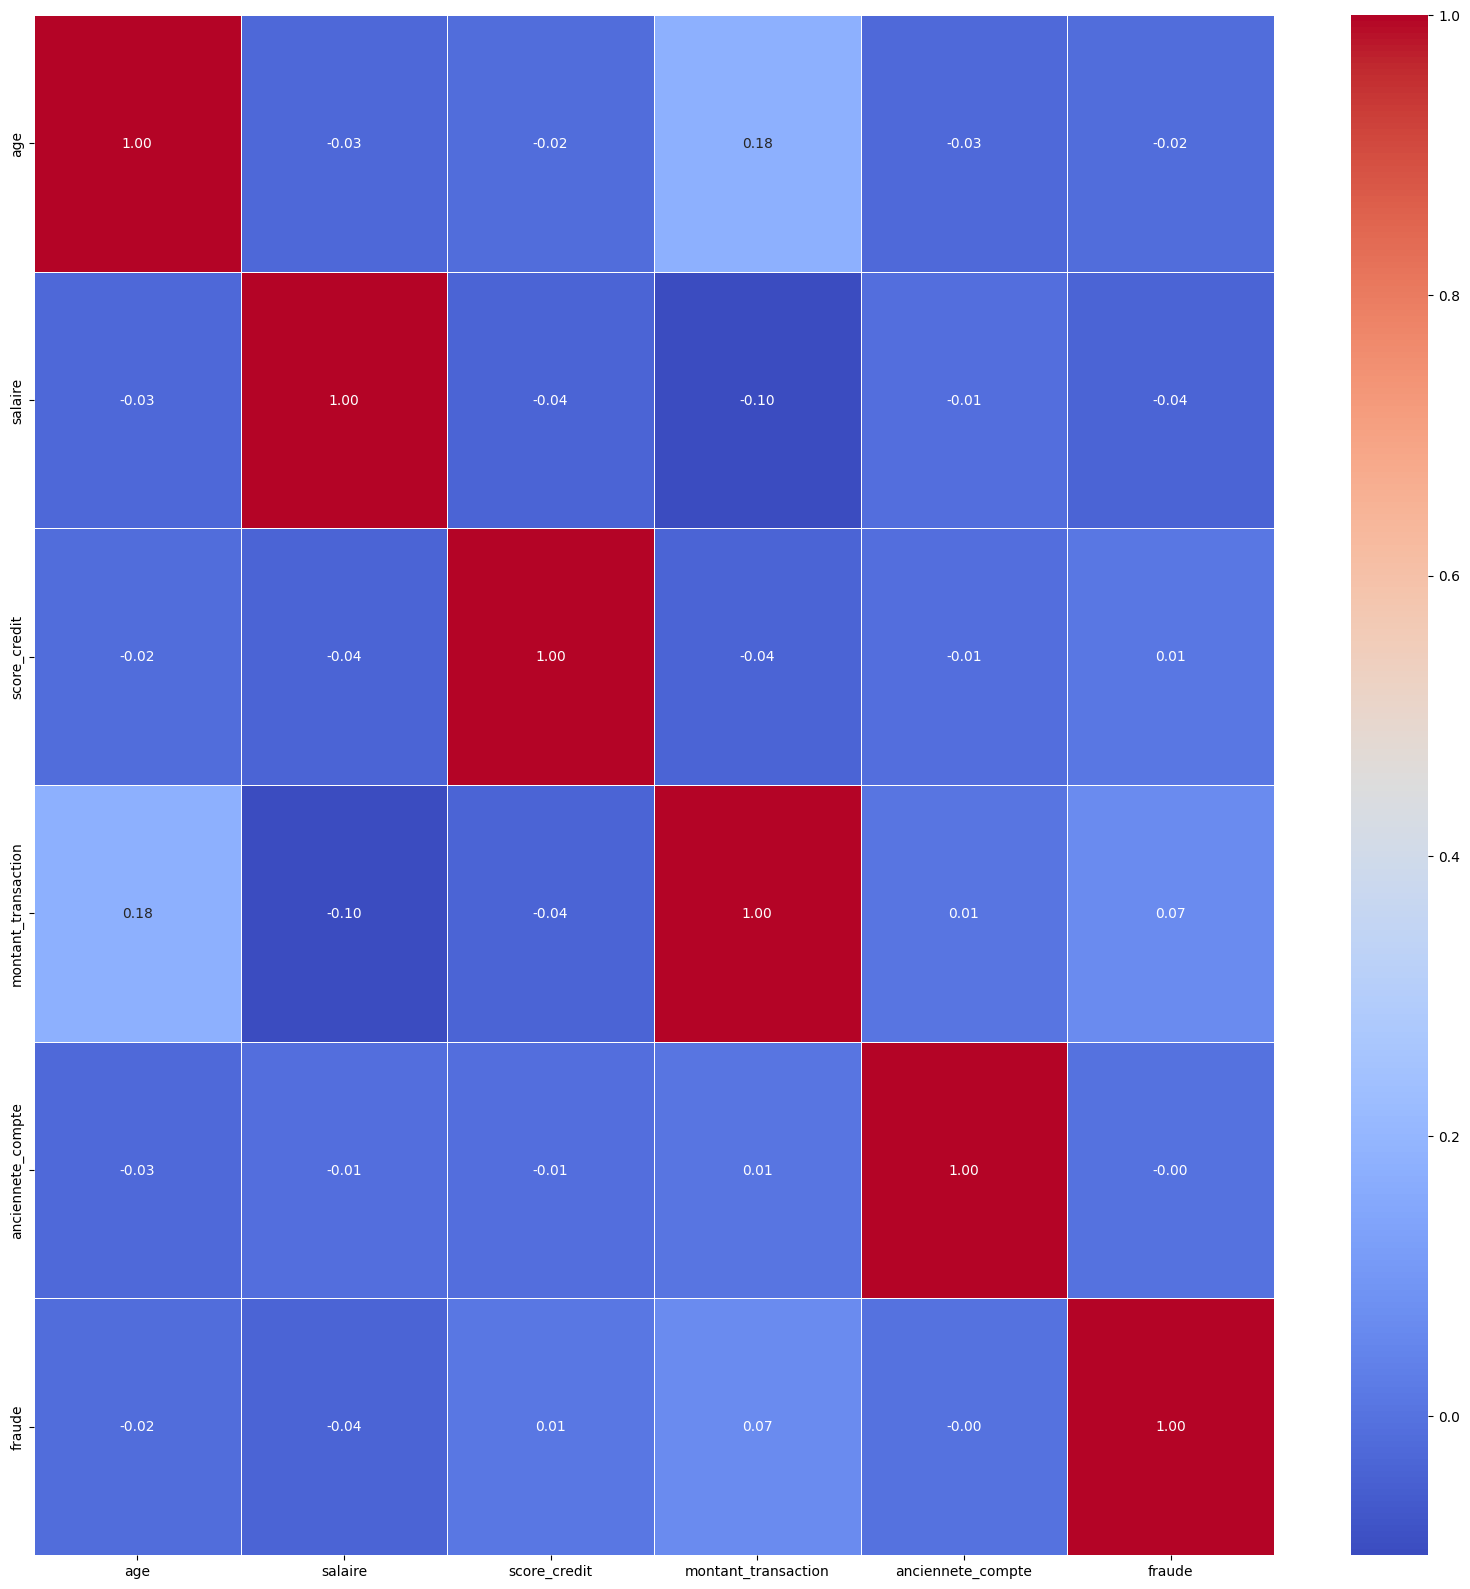

In [371]:
mp.figure(figsize = (20,20))
sns.heatmap(dataSup.corr(), annot=True,cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [372]:
# nous n'avons aucune corrélation forte, les corrélations fortes commencent à partir de 0.7 sur le plan théorique

#### 6-) Représentation des Boxplots et gestion des outliners

In [373]:
# boxplot sur chaque colonnes pour voir si nous avons des outliners

In [374]:
# visualisons les colonnes de notre dataset
data.columns

Index(['age', 'salaire', 'score_credit', 'montant_transaction',
       'anciennete_compte', 'type_carte', 'region', 'genre', 'fraude'],
      dtype='object')

<Axes: ylabel='age'>

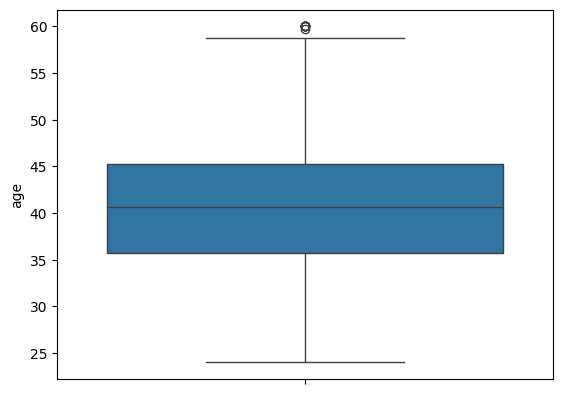

In [375]:
sns.boxplot(y="age", data=data)

In [376]:
# la colonne age ne contient pas de outliners

<Axes: ylabel='salaire'>

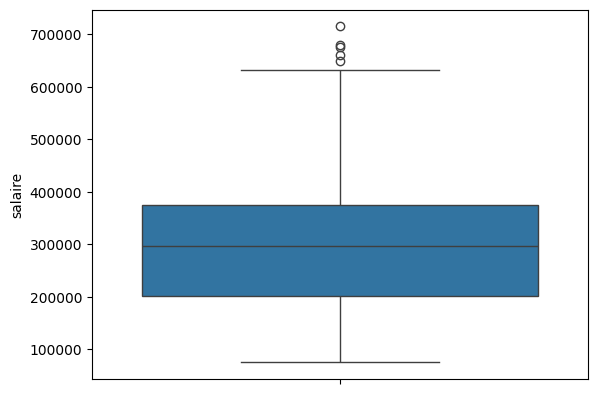

In [377]:
sns.boxplot(y="salaire", data=data)

<Axes: ylabel='score_credit'>

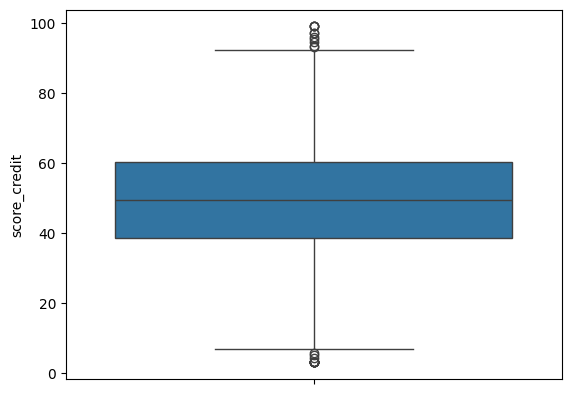

In [378]:
# boxplot sur la colonne credit_score
sns.boxplot(y="score_credit",data=data)

<Axes: ylabel='montant_transaction'>

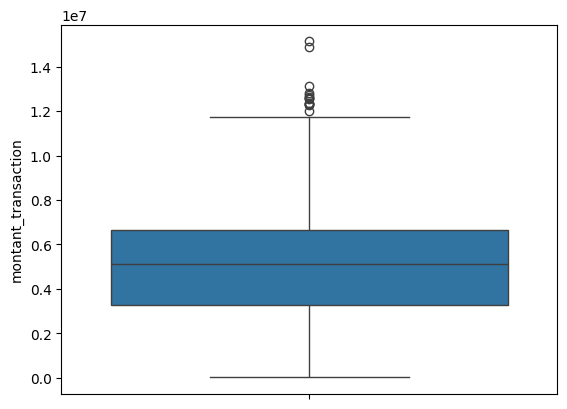

In [379]:
sns.boxplot(y="montant_transaction", data=data)

<Axes: ylabel='anciennete_compte'>

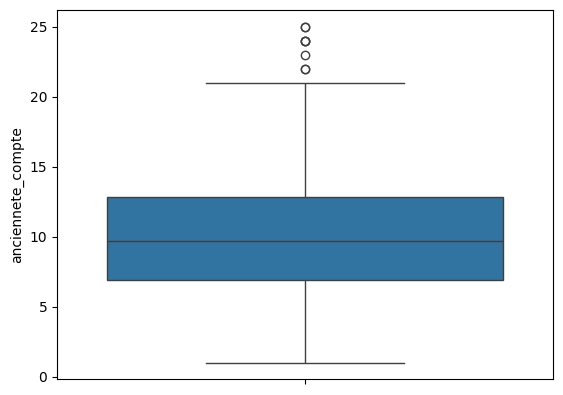

In [380]:
sns.boxplot(y="anciennete_compte",data=data)

In [381]:
# il y'a effectivement des données abérantes sur certaines colonne réprons les afin de mieux les gérer: nous allons utiliser la méthode du quartile
# avec cette méthode nous allons répérer tous les outliers et les remplacer par la valeur max de la distribution pour ceux qui dépassent cette valeur
# et par le min de la distribution pour ceux qui sont inférieur a cete valeur

##### 6.1) Définition de la fonction qui va nous permettre de trouver les outliners sur toutes les colonnes

In [382]:
#1 - Traitements des valeurs aberrantes
# Fonction pour detecter et remplacer les valeurs aberrantes avec les Bounds
def replace_outlier(df):
    for col in df.select_dtypes(include=["number"]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

data = replace_outlier(data)
data

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.000000,0.0,2.531328,0.0,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,9.655656,0.0,2.531328,0.0,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.000000,1.0,2.531328,1.0,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.000000,0.0,3.156250,0.0,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.000000,0.0,3.156250,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1925,45.597241,298542.011574,85.246862,5.284009e+06,7.616324,0.0,2.742782,1.0,1.0
1926,43.876065,154884.988653,61.960407,4.682180e+06,13.085475,1.0,2.544682,1.0,1.0
1927,37.003946,356817.861161,64.005850,5.961519e+06,13.754219,1.0,3.156250,0.0,1.0
1928,49.699669,296987.130115,49.886796,5.745819e+06,13.929936,0.0,2.542274,1.0,1.0


In [383]:
# convertir fraude en int
data.fraude = data.fraude.astype(int)

In [384]:
data.fraude.value_counts()

,count
fraude,
0,965
1,965


## III-) Représentation des graphiques

In [385]:
# faisons un paiplot
#sns.pairplot(data)

## IV-) Représentation du modèle

#### 1) Séparons X et y

In [386]:
X = data.drop(["fraude"],axis=1).values
X

array([[4.95488940e+01, 1.83659046e+05, 4.82285787e+01, ...,
        0.00000000e+00, 2.53132832e+00, 0.00000000e+00],
       [4.49526654e+01, 3.29732599e+05, 6.75730970e+01, ...,
        0.00000000e+00, 2.53132832e+00, 0.00000000e+00],
       [4.16599104e+01, 7.50000000e+04, 7.75594867e+01, ...,
        1.00000000e+00, 2.53132832e+00, 1.00000000e+00],
       ...,
       [3.70039457e+01, 3.56817861e+05, 6.40058499e+01, ...,
        1.00000000e+00, 3.15625000e+00, 0.00000000e+00],
       [4.96996691e+01, 2.96987130e+05, 4.98867957e+01, ...,
        0.00000000e+00, 2.54227444e+00, 1.00000000e+00],
       [4.88057764e+01, 4.28833163e+05, 4.72035682e+01, ...,
        0.00000000e+00, 3.39399620e+00, 1.00000000e+00]])

In [387]:
y = data[["fraude"]].values
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

#### 2-) Séparons les données du train et du test

In [388]:
# je sépare X_train et y_train à l'aide du modèle train_test_split de scikit learn
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=123)

#### Standardisons notre modèle

In [389]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
#X_trainIverse = Sc.inverse_transform(X_train)
X_test = Sc.transform(X_test)

#### 3-) Entrainons nos modèles

In [390]:
# n'etant pas une fan de pycaret, nous allons procéder mannuellement pour voir le meilleur modèle ensuite nous allons l'optimiser
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
]

In [391]:
model_names = ["Logistic Regression", "SVC", "Decision Trees", "Random Forest", "Gradient Boosting", "KNN", "Naive Bayes"]

train_results = []
test_results = []

****************************LogisticRegression()********************************

************************************************ TRAINING **************************************

pendant le training, l'accuracy  du model LogisticRegression() est : 64.34001382170007

classification report du model LogisticRegression() est 
 :               precision    recall  f1-score   support

           0       0.66      0.57      0.61       716
           1       0.63      0.71      0.67       731

    accuracy                           0.64      1447
   macro avg       0.65      0.64      0.64      1447
weighted avg       0.65      0.64      0.64      1447

Matrice de confusion 

Cross Val Accuracy [0.65753425 0.67123288 0.53424658 0.65753425 0.65753425 0.61643836
 0.69863014 0.73611111 0.69444444 0.58333333 0.56944444 0.56944444
 0.59722222 0.56944444 0.66666667 0.66666667 0.70833333 0.56944444
 0.68055556 0.75      ]
Courbes AUC du training



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

************************************************ TEST**************************************

pendant l'entrainement, l'accuracy  du model LogisticRegression() est : 66.25258799171843

classification report pendant le test du model LogisticRegression() est 
 :               precision    recall  f1-score   support

           0       0.69      0.63      0.66       249
           1       0.64      0.70      0.67       234

    accuracy                           0.66       483
   macro avg       0.66      0.66      0.66       483
weighted avg       0.67      0.66      0.66       483

Matrice de confusion du test 

Cross Val Accuracy of Test [0.44       0.72       0.72       0.875      0.45833333 0.70833333
 0.70833333 0.625      0.66666667 0.75       0.58333333 0.54166667
 0.70833333 0.70833333 0.5        0.70833333 0.375      0.625
 0.66666667 0.625     ]
Courbes AUC du testing

****************************SVC()********************************

********************************************

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

pendant le training, l'accuracy  du model SVC() est : 89.97926744989634

classification report du model SVC() est 
 :               precision    recall  f1-score   support

           0       0.95      0.85      0.89       716
           1       0.86      0.95      0.91       731

    accuracy                           0.90      1447
   macro avg       0.90      0.90      0.90      1447
weighted avg       0.90      0.90      0.90      1447

Matrice de confusion 



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross Val Accuracy [0.83561644 0.84931507 0.87671233 0.89041096 0.87671233 0.89041096
 0.93150685 0.875      0.86111111 0.84722222 0.84722222 0.90277778
 0.81944444 0.80555556 0.80555556 0.84722222 0.90277778 0.88888889
 0.84722222 0.86111111]
Courbes AUC du training

************************************************ TEST**************************************

pendant l'entrainement, l'accuracy  du model SVC() est : 84.472049689441

classification report pendant le test du model SVC() est 
 :               precision    recall  f1-score   support

           0       0.92      0.77      0.84       249
           1       0.79      0.93      0.85       234

    accuracy                           0.84       483
   macro avg       0.85      0.85      0.84       483
weighted avg       0.86      0.84      0.84       483

Matrice de confusion du test 



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross Val Accuracy of Test [0.72       0.76       0.88       0.91666667 0.75       0.875
 0.83333333 0.83333333 0.83333333 0.91666667 0.79166667 0.75
 0.95833333 0.83333333 0.70833333 0.83333333 0.54166667 0.875
 0.79166667 0.79166667]
Courbes AUC du testing

****************************DecisionTreeClassifier()********************************

************************************************ TRAINING **************************************

pendant le training, l'accuracy  du model DecisionTreeClassifier() est : 100.0

classification report du model DecisionTreeClassifier() est 
 :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       716
           1       1.00      1.00      1.00       731

    accuracy                           1.00      1447
   macro avg       1.00      1.00      1.00      1447
weighted avg       1.00      1.00      1.00      1447

Matrice de confusion 

Cross Val Accuracy [0.87671233 0.90410959 0.91780822 0.8767123

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


pendant le training, l'accuracy  du model RandomForestClassifier() est : 100.0

classification report du model RandomForestClassifier() est 
 :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       716
           1       1.00      1.00      1.00       731

    accuracy                           1.00      1447
   macro avg       1.00      1.00      1.00      1447
weighted avg       1.00      1.00      1.00      1447

Matrice de confusion 



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross Val Accuracy [0.93150685 0.95890411 0.97260274 0.95890411 0.98630137 0.94520548
 0.98630137 0.98611111 0.98611111 0.94444444 0.97222222 0.93055556
 0.93055556 0.94444444 0.98611111 0.97222222 0.98611111 0.94444444
 0.95833333 0.95833333]
Courbes AUC du training

************************************************ TEST**************************************

pendant l'entrainement, l'accuracy  du model RandomForestClassifier() est : 95.23809523809523

classification report pendant le test du model RandomForestClassifier() est 
 :               precision    recall  f1-score   support

           0       0.94      0.96      0.95       249
           1       0.96      0.94      0.95       234

    accuracy                           0.95       483
   macro avg       0.95      0.95      0.95       483
weighted avg       0.95      0.95      0.95       483

Matrice de confusion du test 



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross Val Accuracy of Test [1.         0.92       0.96       0.875      0.875      0.95833333
 0.91666667 0.95833333 0.83333333 1.         0.95833333 0.79166667
 0.95833333 0.83333333 0.875      0.91666667 0.95833333 0.83333333
 0.83333333 0.95833333]
Courbes AUC du testing

****************************GradientBoostingClassifier()********************************

************************************************ TRAINING **************************************



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pendant le training, l'accuracy  du model GradientBoostingClassifier() est : 96.06081548030407

classification report du model GradientBoostingClassifier() est 
 :               precision    recall  f1-score   support

           0       0.95      0.97      0.96       716
           1       0.97      0.95      0.96       731

    accuracy                           0.96      1447
   macro avg       0.96      0.96      0.96      1447
weighted avg       0.96      0.96      0.96      1447

Matrice de confusion 



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Cross Val Accuracy [0.91780822 0.94520548 0.91780822 0.87671233 0.91780822 0.90410959
 0.94520548 0.90277778 0.93055556 0.95833333 0.93055556 0.90277778
 0.94444444 0.84722222 0.93055556 0.95833333 0.97222222 0.91666667
 0.95833333 0.93055556]
Courbes AUC du training

************************************************ TEST**************************************

pendant l'entrainement, l'accuracy  du model GradientBoostingClassifier() est : 92.54658385093167

classification report pendant le test du model GradientBoostingClassifier() est 
 :               precision    recall  f1-score   support

           0       0.90      0.96      0.93       249
           1       0.95      0.89      0.92       234

    accuracy                           0.93       483
   macro avg       0.93      0.92      0.93       483
weighted avg       0.93      0.93      0.93       483

Matrice de confusion du test 



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Cross Val Accuracy of Test [0.88       0.88       0.92       0.83333333 0.875      0.875
 0.83333333 0.91666667 0.83333333 1.         0.95833333 0.83333333
 0.91666667 0.83333333 0.95833333 0.91666667 0.95833333 0.875
 0.91666667 0.83333333]
Courbes AUC du testing

****************************KNeighborsClassifier()********************************

************************************************ TRAINING **************************************

pendant le training, l'accuracy  du model KNeighborsClassifier() est : 87.00760193503801

classification report du model KNeighborsClassifier() est 
 :               precision    recall  f1-score   support

           0       0.99      0.74      0.85       716
           1       0.80      0.99      0.89       731

    accuracy                           0.87      1447
   macro avg       0.90      0.87      0.87      1447
weighted avg       0.89      0.87      0.87      1447

Matrice de confusion 



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Cross Val Accuracy [0.7260274  0.78082192 0.80821918 0.7260274  0.80821918 0.87671233
 0.91780822 0.76388889 0.77777778 0.83333333 0.79166667 0.84722222
 0.77777778 0.75       0.79166667 0.83333333 0.84722222 0.79166667
 0.83333333 0.80555556]
Courbes AUC du training

************************************************ TEST**************************************

pendant l'entrainement, l'accuracy  du model KNeighborsClassifier() est : 80.74534161490683

classification report pendant le test du model KNeighborsClassifier() est 
 :               precision    recall  f1-score   support

           0       0.96      0.65      0.78       249
           1       0.72      0.97      0.83       234

    accuracy                           0.81       483
   macro avg       0.84      0.81      0.80       483
weighted avg       0.85      0.81      0.80       483

Matrice de confusion du test 



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Cross Val Accuracy of Test [0.6        0.72       0.8        0.91666667 0.625      0.70833333
 0.75       0.875      0.83333333 0.875      0.79166667 0.58333333
 0.83333333 0.75       0.75       0.83333333 0.54166667 0.75
 0.83333333 0.70833333]
Courbes AUC du testing

****************************GaussianNB()********************************

************************************************ TRAINING **************************************

pendant le training, l'accuracy  du model GaussianNB() est : 70.14512785072564

classification report du model GaussianNB() est 
 :               precision    recall  f1-score   support

           0       0.70      0.70      0.70       716
           1       0.71      0.70      0.70       731

    accuracy                           0.70      1447
   macro avg       0.70      0.70      0.70      1447
weighted avg       0.70      0.70      0.70      1447

Matrice de confusion 

Cross Val Accuracy [0.65753425 0.65753425 0.61643836 0.71232877 0.76712329 0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross Val Accuracy of Test [0.52       0.68       0.68       0.83333333 0.58333333 0.79166667
 0.625      0.70833333 0.75       0.66666667 0.625      0.66666667
 0.70833333 0.66666667 0.5        0.70833333 0.41666667 0.70833333
 0.70833333 0.625     ]
Courbes AUC du testing



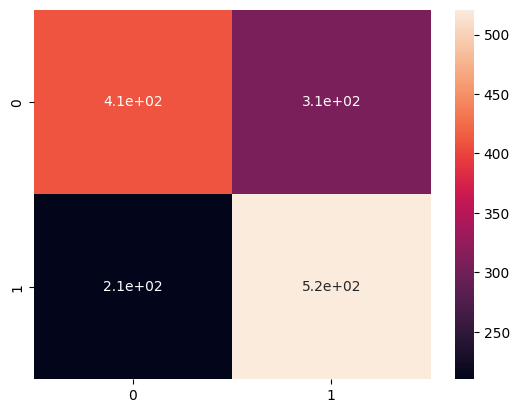

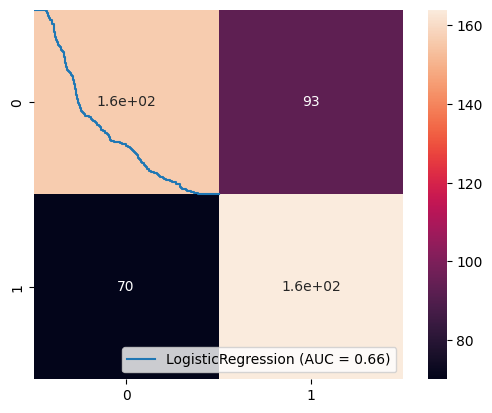

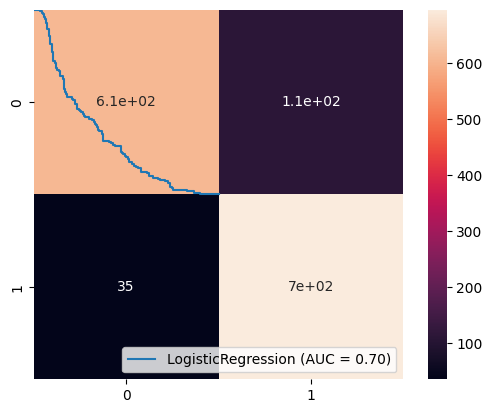

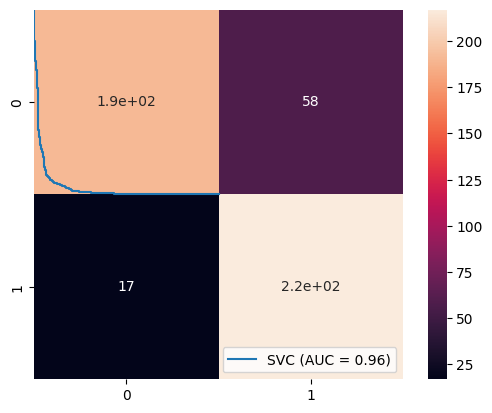

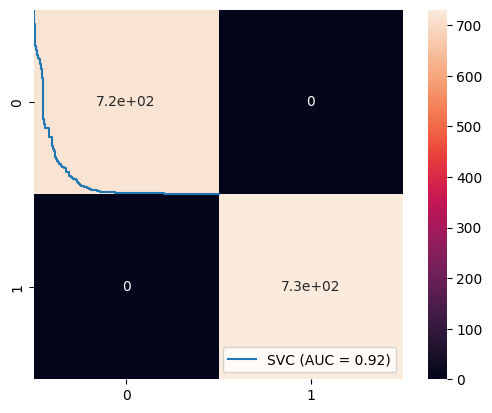

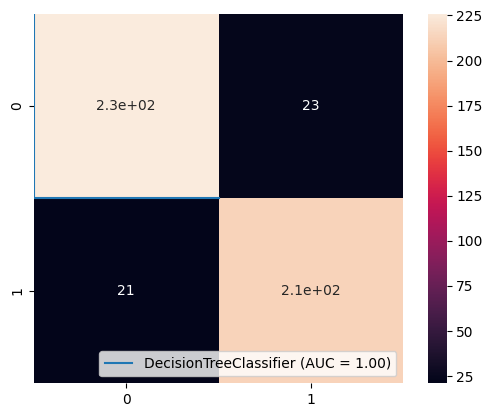

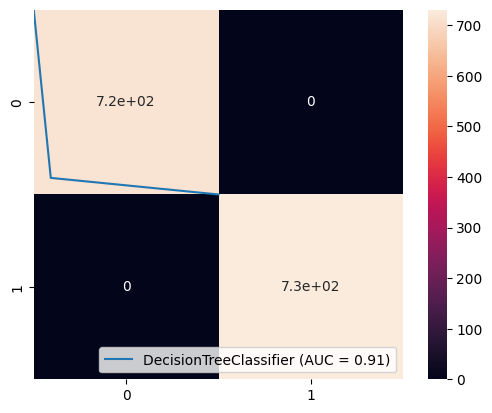

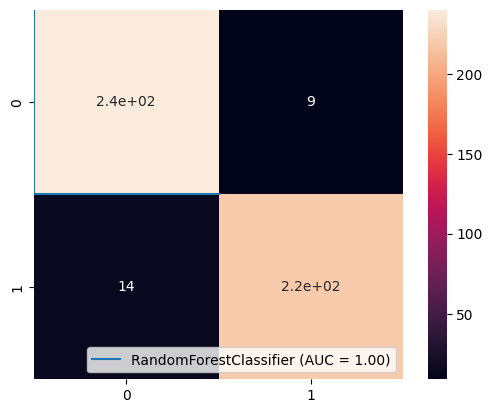

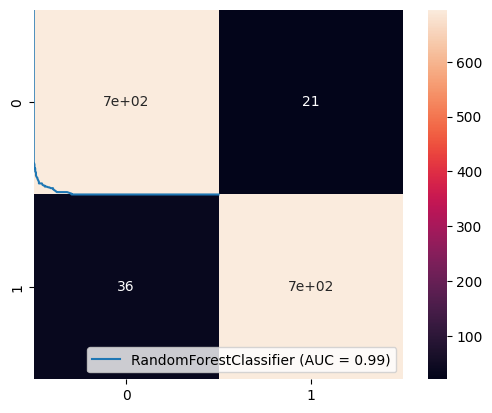

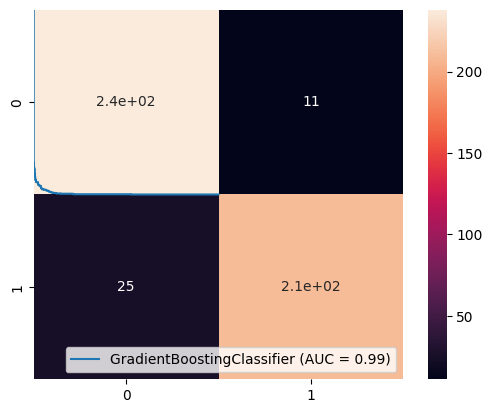

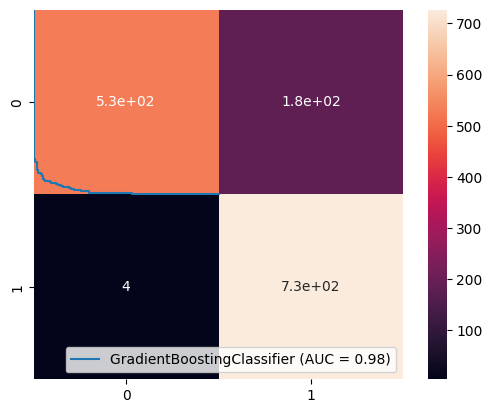

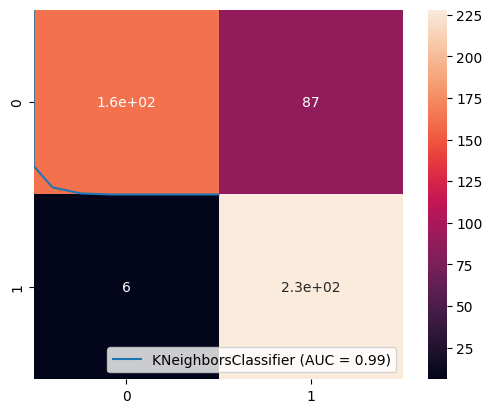

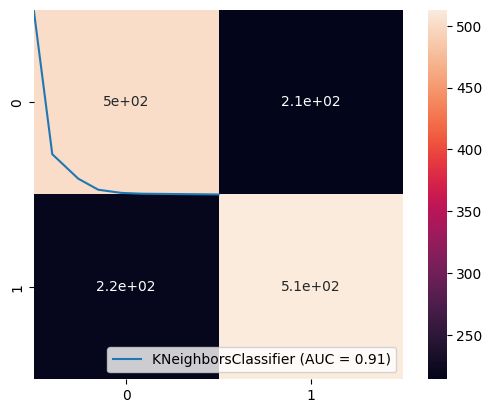

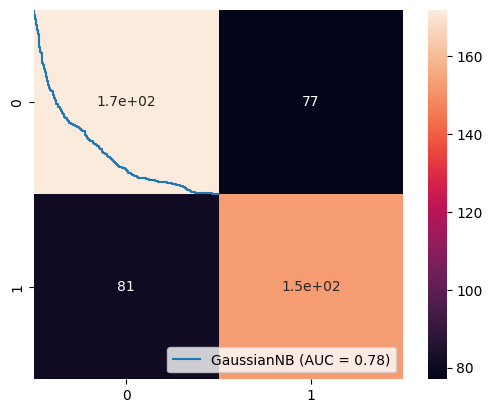

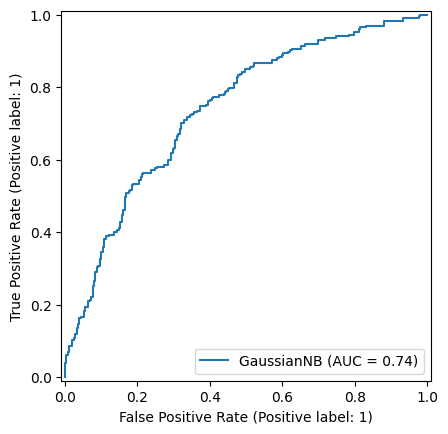

In [392]:
for model in models:
#     le nom de notre model
    print(f"****************************{model}********************************\n")
    print("************************************************ TRAINING **************************************\n")
#     on donne nos paramètres au model crée dans models
    model.fit(X_train, y_train)
#     on détermine le y_predict et le accuracy du training
    model_y_train_prediction = model.predict(X_train)
    model_train_acc = accuracy_score(y_train, model_y_train_prediction)
    print(f"pendant le training, l'accuracy  du model {model} est : {model_train_acc*100}"'\n')
#     on affiche le classification report du model
    print(f"classification report du model {model} est \n : {classification_report(y_train, model_y_train_prediction)}")
#     on affiche la matrice de confusion du model
    print("Matrice de confusion \n")
    conf= confusion_matrix(y_train,model_y_train_prediction)
    sns.heatmap(conf,annot=True)
#     effectuons le cross validation afin de voir comment le model s'est entrainé
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=20)
    print("Cross Val Accuracy", (accuracies))
    print("Courbes AUC du training\n")
    RocCurveDisplay.from_estimator(model, X_train,y_train)
#     on remplie notre tableau d'accuracy
    train_results.append(model_train_acc)
    print("************************************************ TEST**************************************\n")
#     testons notre modèle
    model_y_test_prediction = model.predict(X_test)
    model_accTest = accuracy_score(y_test, model_y_test_prediction)
    print(f"pendant l'entrainement, l'accuracy  du model {model} est : {model_accTest*100}"'\n')
#     affichons le classification report
    print(f"classification report pendant le test du model {model} est \n : {classification_report(y_test, model_y_test_prediction)}")
#     on affiche la matrice de confusion du model pendant le test
    print("Matrice de confusion du test \n")
    conf= confusion_matrix(y_test,model_y_test_prediction)
    sns.heatmap(conf,annot=True)
#     effectuons le cross validation du test
    accuraciesTest = cross_val_score(estimator=model, X=X_test, y=y_test, cv=20)
    print("Cross Val Accuracy of Test", (accuraciesTest))
    print("Courbes AUC du testing\n")
    RocCurveDisplay.from_estimator(model, X_test,y_test)
#     on remplie notre tableau d'accuracy
    test_results.append(model_accTest)

In [393]:
model_names

['Logistic Regression',
 'SVC',
 'Decision Trees',
 'Random Forest',
 'Gradient Boosting',
 'KNN',
 'Naive Bayes']

In [394]:
train_results


[0.6434001382170007,
 0.8997926744989634,
 1.0,
 1.0,
 0.9606081548030407,
 0.8700760193503801,
 0.7014512785072564]

In [395]:
test_results

[0.6625258799171843,
 0.84472049689441,
 0.9089026915113871,
 0.9523809523809523,
 0.9254658385093167,
 0.8074534161490683,
 0.6728778467908902]

In [396]:
# gradiant boosting a mieux appris que random forest mais nous choisirons random forest pare que gradiant boosting pose souvent des problèmes
# dans l'application streamlit lorsqu'on l'importe sous format pkl

In [397]:
# optimisation de rf avec les hyperparamètres ( grid search)
rf = RandomForestClassifier()

# Définition des paramètres à tester
param_grid = {
    'n_estimators': [100, 200,250],
    'max_depth': [None, 10, 20,25],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Grid search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 25],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 250]},
             scoring='accuracy', verbose=2)

In [398]:
# Best model
best_model = grid_search.best_estimator_

In [399]:
# Evaluate
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       249
           1       0.98      0.94      0.96       234

    accuracy                           0.96       483
   macro avg       0.96      0.96      0.96       483
weighted avg       0.96      0.96      0.96       483



In [400]:
# Print best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [401]:
# redefinit random forest avec les hyperparamètres
best_params = {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

rf = RandomForestClassifier(random_state=42, **best_params) # Ou RandomForestClassifier si c'est le cas
rf.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

#### 4-) déterminons le y_predict et déterminons le accuracy

In [402]:
y_train_predict = rf.predict(X_train)
acc = accuracy_score(y_train, y_train_predict)
acc

1.0

#### 5) Affichons le classification report qui contient nos métriques

In [403]:
print(f"classifi\n {classification_report(y_train, y_train_predict)} ")

classifi
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       716
           1       1.00      1.00      1.00       731

    accuracy                           1.00      1447
   macro avg       1.00      1.00      1.00      1447
weighted avg       1.00      1.00      1.00      1447
 


<Axes: >

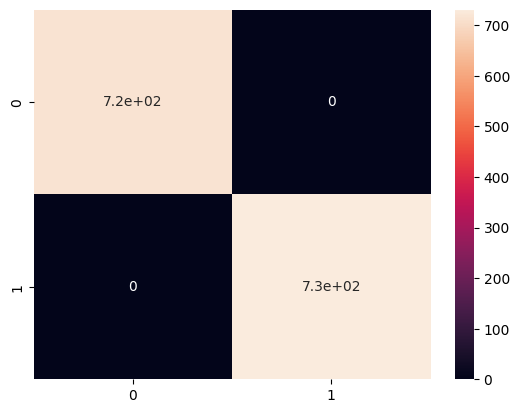

In [404]:
conf= confusion_matrix(y_train,y_train_predict)
sns.heatmap(conf,annot=True)

#### 5.1) Faisons un cross validation pendant le training

In [405]:
# #KFold: nombre de coupure, nous avons un dataset de plus de 20000 données nous allons choisir une segmentation ou coupure de 20 segment
accuracies = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=20)
print("Cross Val Accuracy", (accuracies))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross Val Accuracy [0.94520548 0.95890411 0.97260274 0.95890411 0.98630137 0.94520548
 0.98630137 1.         0.98611111 0.95833333 0.97222222 0.93055556
 0.94444444 0.95833333 0.97222222 0.97222222 0.98611111 0.95833333
 0.95833333 0.97222222]


#### 6) testons notre modèle et affichons le accuracy

In [406]:
y_test_predict = rf.predict(X_test)
acc = accuracy_score(y_test, y_test_predict)
acc

0.9585921325051759

In [407]:
print(classification_report(y_test, y_test_predict))
# # plus le f1_score est élevée mieux c'est, parce qu'il prends en compte la precision et le recall

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       249
           1       0.98      0.94      0.96       234

    accuracy                           0.96       483
   macro avg       0.96      0.96      0.96       483
weighted avg       0.96      0.96      0.96       483



<Axes: >

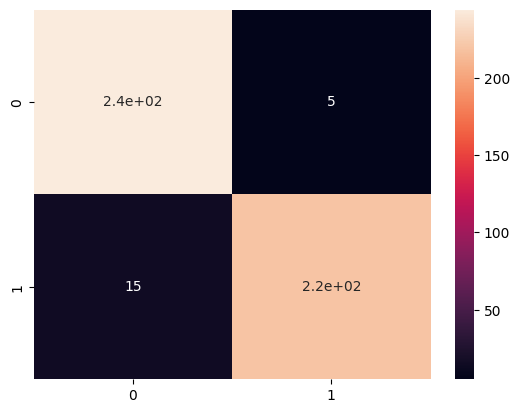

In [408]:
conf= confusion_matrix(y_test,y_test_predict)
sns.heatmap(conf,annot=True)

### 6.1) Faisons un Cross Validation afin de voir comment le test c'est passé

In [409]:
#KFold: nombre de coupure, nous avons un dataset de plus de 20000 données nous allons choisir une segmentation ou coupure de 20 segment
accuracies = cross_val_score(estimator=rf, X=X_test, y=y_test, cv=20)
print("Cross Val Accuracy", (accuracies))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross Val Accuracy [1.         0.92       0.92       0.875      0.91666667 0.91666667
 0.83333333 0.91666667 0.83333333 1.         0.91666667 0.79166667
 0.91666667 0.95833333 0.875      0.91666667 0.95833333 0.875
 0.875      0.95833333]


In [410]:
# interpretation
# le training c'est bien passé sur plusieurs segments/proportion de données

#### 7) représentons la courbe AUC du train

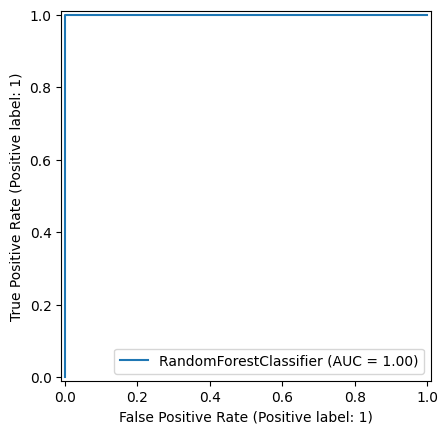

In [411]:
# les courbes AUC et le SCORE_IC
RocCurveDisplay.from_estimator(rf, X_train,y_train)

#### Courbes AUC du test

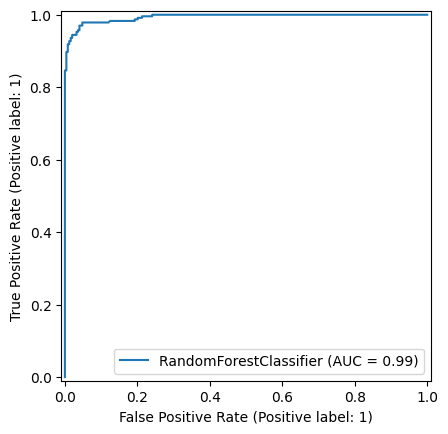

In [412]:
# les courbes AUC et le SCORE_IC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rf, X_test,y_test)

In [413]:
# jexporte le model sous format pickle
pickle.dump(rf, open('model.pkl', 'wb'))